<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿-Por-qué-normalizar-o-estandarizar-los-datos?" data-toc-modified-id="¿-Por-qué-normalizar-o-estandarizar-los-datos?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿ Por qué normalizar o estandarizar los datos?</a></span></li><li><span><a href="#¿Qué-distribución-tienen--nuestros-datos?" data-toc-modified-id="¿Qué-distribución-tienen--nuestros-datos?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>¿Qué distribución tienen  nuestros datos?</a></span></li><li><span><a href="#Normalización" data-toc-modified-id="Normalización-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Normalización</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-normalización" data-toc-modified-id="Tipos-de-normalización-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tipos de normalización</a></span><ul class="toc-item"><li><span><a href="#Manualmente" data-toc-modified-id="Manualmente-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Manualmente</a></span></li><li><span><a href="#Transformaciones-logarítmicas-o-raices-cuadradas." data-toc-modified-id="Transformaciones-logarítmicas-o-raices-cuadradas.-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Transformaciones logarítmicas o raices cuadradas.</a></span></li><li><span><a href="#Sklearn-MinMaxScaller" data-toc-modified-id="Sklearn-MinMaxScaller-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Sklearn MinMaxScaller</a></span></li></ul></li></ul></li><li><span><a href="#Estandarización" data-toc-modified-id="Estandarización-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Estandarización</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-estandarización" data-toc-modified-id="Tipos-de-estandarización-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tipos de estandarización</a></span><ul class="toc-item"><li><span><a href="#Manualmente" data-toc-modified-id="Manualmente-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Manualmente</a></span></li><li><span><a href="#Sklearn-StandardScaler" data-toc-modified-id="Sklearn-StandardScaler-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Sklearn StandardScaler</a></span></li><li><span><a href="#Sklearn-RobustScaler" data-toc-modified-id="Sklearn-RobustScaler-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Sklearn RobustScaler</a></span></li></ul></li></ul></li><li><span><a href="#Diferencias-entre-normalización-y-estandarización" data-toc-modified-id="Diferencias-entre-normalización-y-estandarización-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Diferencias entre normalización y estandarización</a></span></li></ul></div>

normalizar 
- buscamos que los datos sean normales (gauss) 
- variable respuesta 
- distplot / histplot 
- test shapiro // test kolmogorov -> pvalor (relacionado con el intervalo de confianza)
  <br>en una distribución normal, el intervalo de confianza de 0.95 (mediana +- 3*stdev). por eso el p-valor es menor que 0.05, estás en la parte de la gráfica normal en la que te puedes equivocar, por lo que no estás en la parte normal del chart.
  - p-valor > 0.05 -- no tenemos suficientes evidencias estadísticas para aceptar H0 
  - p-valor < 0.05 no normales
  - si los datos no son normales, hay que hacer una serie de transformaciones:
    - standard scaler (con scikit-learn)
    - transformación logarítmica
    - raíz cuadrada
    - box-cox
<br>si pese a todo no sé consigue normalidad, se pasan a otros modelos.
<br>si es normal:
  - regresión lineal
  - regresión logarítmica

estandarización 
- valores de 0 a 1 
- variables predictoras
- métodos:
  - RobustScaler -- respecto a la media/mediana del rango intercuartílico (IQR) -- datos sin tratar + bastantes outliers
  - StandardScaler -- respecto a la media/mediana del total de los datos -- datos tratados + pocos outliers

In [1]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

# ¿ Por qué normalizar o estandarizar los datos? 


Principlamente hay dos motivos: 


1. Supongamos que tenemos un dataframe que contiene dos variables: 

    - El tiempo de viaje y 

    - La distancia recorrida. 

    El tiempo se mide en horas (por ejemplo, 5, 10, 25 horas) y la distancia en millas (por ejemplo, 500, 800, 1200 kilometros). 

   Problemas que nos encontramos: 

    - Un problema es que estas dos variables se miden en dos unidades diferentes: una en horas y otra en kilometros. 
    -  La distribución de los datos, es bastante diferente en estas dos variables (tanto dentro de las variables como entre ellas). Una va de 5 -25 y la otra de 500-1200. 
    
    > El objetivo es transformar los datos de manera que no tengan dimensiones y/o tengan distribuciones similares. La normalización es un paso esencial en el preprocesamiento de datos en cualquier aplicación de *machine learning* y ajuste de modelos.

2. En el caso de que estemos haciendo un modelo de regresión, nuestra variable respuesta, la que vamos a predecir debe seguir una distribución normal. 


In [2]:
df = pd.read_csv("data/solo_california.csv", index_col = 0)

In [3]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50


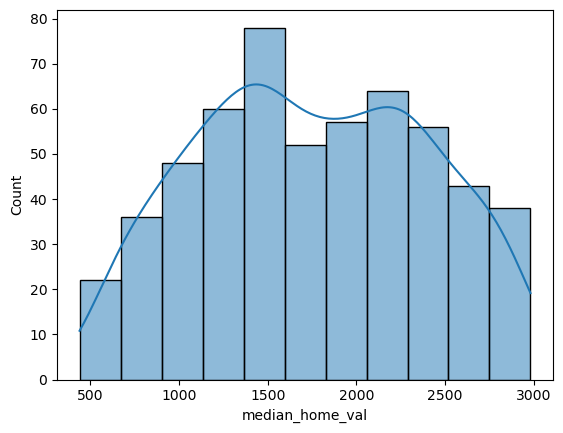

In [8]:
sns.histplot(df, x = 'median_home_val', kde = True);

para confirmar si el chart es normal o no: test de shapiro

In [9]:
stats.shapiro(df['median_home_val'])

ShapiroResult(statistic=0.9728603363037109, pvalue=1.3185727176789896e-08)

te da el p valor -- si supera el 0.5 -->

si el p-valor es menor qu 0.5, no tienes suficientes evicdencias estadísticas para aceptar la h0. por tanto, no la puedes aceptar, tu h0 no es cierta y tus datos no son normales.

# ¿Qué distribución tienen  nuestros datos? 

Antes de ponernos manos a la obra, tenemos que saber como están distribuidos nuestros datos. Esta es la distribución más frecuente. Consiste en una gráfica de la función de densidad que tiene una forma acampanada y simétrica. Es la conocemos como **campana de Gauss**. 

[Aquí](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) más info sobre este tipo de distribución. 

In [10]:
# nos hacemos un subset solo con las numéricas

num = df.select_dtypes(include = np.number)
num.head()

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,1026.0,459.0,470.0,491.0,496.0,13803.0,11.250000
12,1538.0,271.0,317.0,342.0,393.0,15627.0,5.500000
16,596.0,164.0,168.0,181.0,190.0,5273.0,16.500000
19,2362.0,613.0,632.0,655.0,678.0,21179.0,8.928571
20,2089.0,275.0,296.0,322.0,356.0,10484.0,7.125000


In [11]:
columnas = num.columns
columnas

Index(['median_home_val', 'median_household_income', 'num_habitaciones',
       'num_vecinos', 'total_habitaciones', 'total_baños', 'dist_playa'],
      dtype='object')

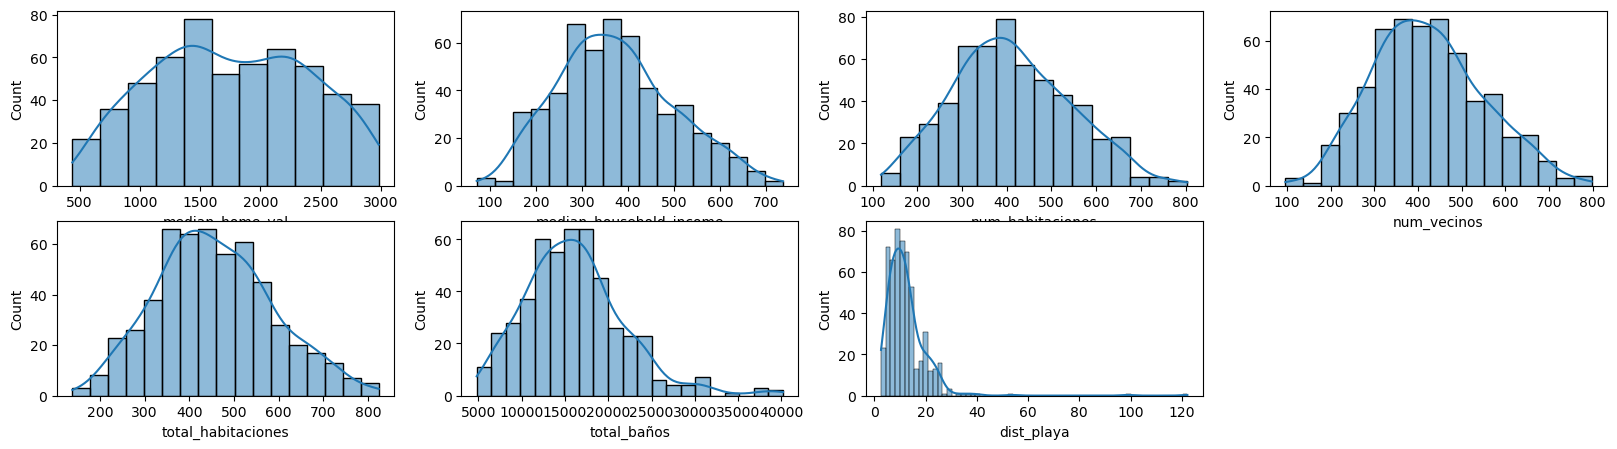

In [12]:
fig, ax = plt.subplots(2,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(columnas):
    sns.histplot(data = num, x = columna, kde = True, ax = ax[i])
    
fig.delaxes(ax[-1])
plt.show()

# Normalización 

Cuando hacemos modelos de predicción de tipo regresión lineal se deben de cumplir una serie de asunciones (las vimos en lecciones anteriores), una de ellas era que nuestros datos se tienen que ajustar a una distribución normal, es decir, si lo vieramos gráficamente debería tener forma de campana de Gauss. Muchas veces nos encontraremos que no tienen esta forma y necesitaremos ajustarla.

En nuestro caso queremos evaluar de que depende el precio del alquiler de pisos. En nuestro dataframe tendremos múltiples columnas, una de ellas el precio de los pisos y otras columnas como el índice de criminalidad, la edad, la cercanía al río, etc. En este caso nuestra variable respuesta es el precio de las casas. Cuando hacemos este tipo de análisis, debemos asegurarnos que nuestra variable respuesta tenga una distribución normal. Por lo tanto, importante, usaremos esta aproximación para hacer que nuestra variable respuesta(la que queremos predecir) tenga una distribución de campana de Gauss.

En el caso del csv que usaremos en la lección de hoy la variable respuesta es MEDV. Pero... 🤔¿Cómo podíamos saber si la variable es normal o no? Para ello tendremos varias opciones, visualmente, o aplicando ciertos test,como por ejemplo el Shapiro test.

In [13]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50


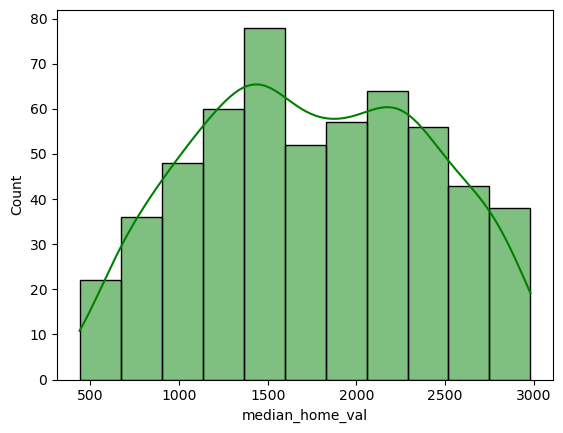

In [14]:
sns.histplot(df["median_home_val"], 
             kde = True, 
             color = "green");


In [15]:
stats.shapiro(df["median_home_val"])

ShapiroResult(statistic=0.9728603363037109, pvalue=1.3185727176789896e-08)

- H0: Datos normales
    
- H1: Datos no normales

Interpretemos:

- Si p-valor < 0.05 rechazamos la hipótesis nula, por lo tanto, los datos no son normales.

- Si p-valor > 0.05 no podemos rechazar la hipótesis nula, es decir, nuestros datos son normales.

**Conclusión**: Nuestros datos no son normales y, por lo tanto podremos intertar realizar una serie de transformaciones que nos permitan que se ajusten a una normal.



## Tipos de normalización

### Manualmente



$$ x´ =  \frac{x -  µ}{max(x) - min(x)}$$

Donde: 

- `X`: es el valor que queremos normalizar.


- `µ`: es la media de todos los valores que queremos normalizar.

 
- `max(x)`: el valor máximo de nuestra variable.


- `min(x)`: el valor mínimo de nuestra variable.


In [16]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = df["median_home_val"].mean()
maximo = df["median_home_val"].max() 
minimo = df["median_home_val"].min()

In [17]:
df["median_home_val_NORM"] = (df["median_home_val"] - media) / (maximo - minimo )

In [18]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,-0.287344
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,-0.086007


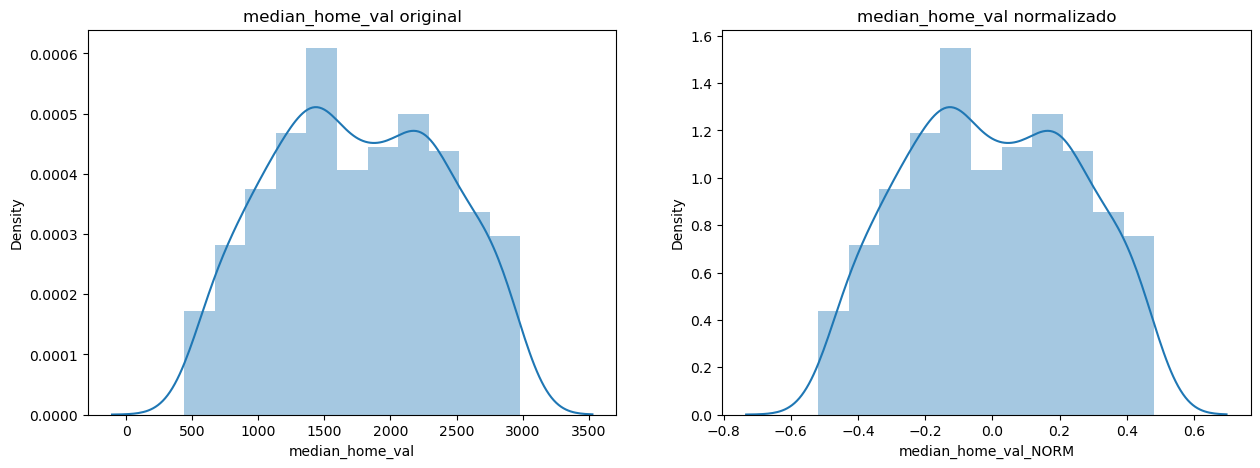

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('median_home_val original')
axes[1].set_title('median_home_val normalizado')

sns.distplot(df['median_home_val'] ,ax = axes[0])
sns.distplot(df['median_home_val_NORM'], ax = axes[1]);

In [20]:
stats.shapiro(df["median_home_val_NORM"])

ShapiroResult(statistic=0.9728603363037109, pvalue=1.3185727176789896e-08)

### Transformaciones logarítmicas o raices cuadradas. 

`LOGARÍTMICA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

En este caso aplicaremos este caso aplicaremos una*list comprehension* para evitar tener errores con los posibles valores 0 que tengamos en nuestra columna. 

In [21]:
df['median_home_val_LOG'] = df['median_home_val'].apply(lambda x: np.log(x) if x != 0 else 0)

In [22]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,-0.287344,6.933423
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,-0.086007,7.338238


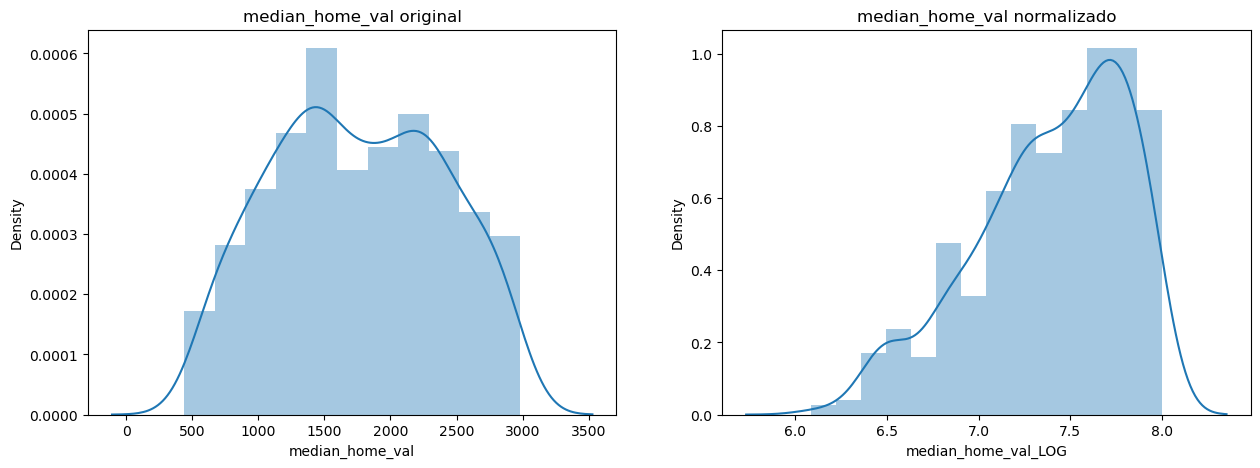

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('median_home_val original')
axes[1].set_title('median_home_val normalizado')

sns.distplot(df['median_home_val'] ,ax = axes[0])
sns.distplot(df['median_home_val_LOG'], ax = axes[1]);

In [24]:
stats.shapiro(df["median_home_val_LOG"])

ShapiroResult(statistic=0.9484020471572876, pvalue=5.575644113076095e-13)

`RAIZ CUADRADA`

La escala logarítmica implica la conversión de una columna a la escala lograrítimica. 

📌 Es importante tener en cuenta que esta transformación no la podremos hacer si tenemos algun valor en nuestra variable que sea 0.

In [25]:
df['median_home_val_SQRT'] = df['median_home_val'].apply(lambda x: math.sqrt(x))

In [26]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG,median_home_val_SQRT
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,-0.287344,6.933423,32.031235
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,-0.086007,7.338238,39.217343


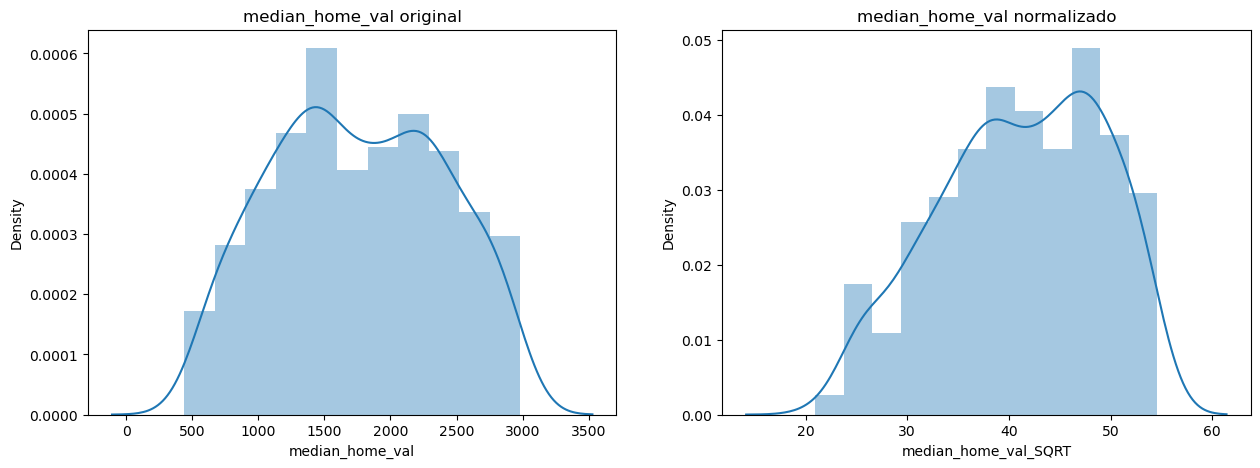

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('median_home_val original')
axes[1].set_title('median_home_val normalizado')

sns.distplot(df['median_home_val'] ,ax = axes[0])
sns.distplot(df['median_home_val_SQRT'], ax = axes[1]);

In [28]:
stats.shapiro(df["median_home_val_SQRT"])

ShapiroResult(statistic=0.9703302383422852, pvalue=3.752714139437785e-09)

BOXCOX

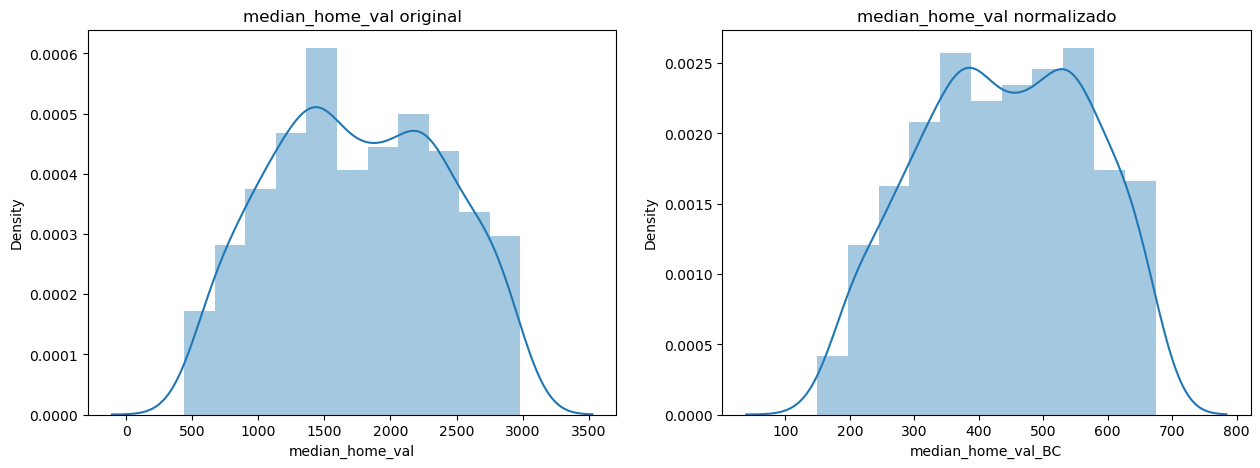

In [32]:
df['median_home_val_BC'], lambda_ajustada = stats.boxcox(df['median_home_val'])
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('median_home_val original')
axes[1].set_title('median_home_val normalizado')

sns.distplot(df['median_home_val'] ,ax = axes[0])
sns.distplot(df['median_home_val_BC'], ax = axes[1]);

In [33]:
stats.shapiro(df["median_home_val_BC"])

ShapiroResult(statistic=0.9738678932189941, pvalue=2.217324457376435e-08)

### Sklearn MinMaxScaller


Es una e las técnicas de normalizado más importantes. Principalmente va a transformar las variables escalando cada una de ellas a un rango determinado, por defecto lo hará entre 0-1
Este estimador escala y traduce cada variable individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.

Su sintaxis es: 

```python
MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
```

Donde: 

- `feature_range`: el rango sobre el que queremos normalizar nuestro datos. Por defecto entre 0 - 1. 


- `copy`: si queremos una copia de nuestra datos normalizada. 


- `clip`: la pondremos en True para recortar los valores transformados de los datos retenidos en el rango de características proporcionado.


Tendremos que usar la siguiente librería 👇🏽

```python
from sklearn.preprocessing import MinMaxScaler
```

In [23]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [24]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[["median_home_val"]])


MinMaxScaler()

In [25]:
# transformamos los datos
X_normalizadas = minmax.transform(df[["median_home_val"]])

In [26]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)


array([0.])

In [27]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [28]:
# lo unimos a nuestro dataframe original
df["median_home_val_NORM2"] = X_normalizadas

In [29]:
df.head(2)


,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG,median_home_val_SQRT,median_home_val_NORM2
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,-0.287344,6.933423,32.031235,0.230830
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,-0.086007,7.338238,39.217343,0.432167


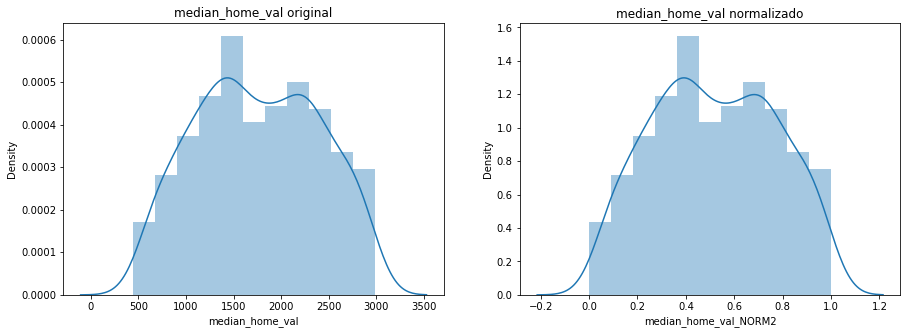

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('median_home_val original')
axes[1].set_title('median_home_val normalizado')

sns.distplot(df['median_home_val'] ,ax = axes[0])
sns.distplot(df['median_home_val_NORM2'], ax = axes[1]);

In [31]:
stats.shapiro(df["median_home_val_NORM2"])

ShapiroResult(statistic=0.9728601574897766, pvalue=1.3184645375474702e-08)

# Estandarización

Estandarizar generalmente significa cambiar los valores de nuestras columnas de manera que la desviación estándar de la distribución sea igual a uno y la media igual a 0. 

$$Z =  \frac{X - µ}{Ω}$$

Donde:

- `X`: es el valor que queremos normalizar.


- `µ`: es la media de todos los valores que queremos normalizar.


- `Ω`: es la desviación estandar de los valores que queremos normalizar.

##  Tipos de estandarización

### Manualmente 

Para poder hacerlo manualmente lo único que tendremos que hacer es aplicar la fórmula de arriba a la columna o columnas que queramos. 

In [32]:
num.head(2)

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25
12,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50


In [33]:
# vamos a crear distintas variables con los estadísticos que necesitamos, media y desviacion estándar

media = df["num_habitaciones"].mean()
desviacion = df["num_habitaciones"].std() 


In [34]:
df["num_habitaciones_ESTA"] = (df["num_habitaciones"] - media) / desviacion

In [35]:
df.head(2)

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG,median_home_val_SQRT,median_home_val_NORM2,num_habitaciones_ESTA
6,CA,F,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25,-0.287344,6.933423,32.031235,0.230830,0.449654
12,CA,M,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50,-0.086007,7.338238,39.217343,0.432167,-0.719670


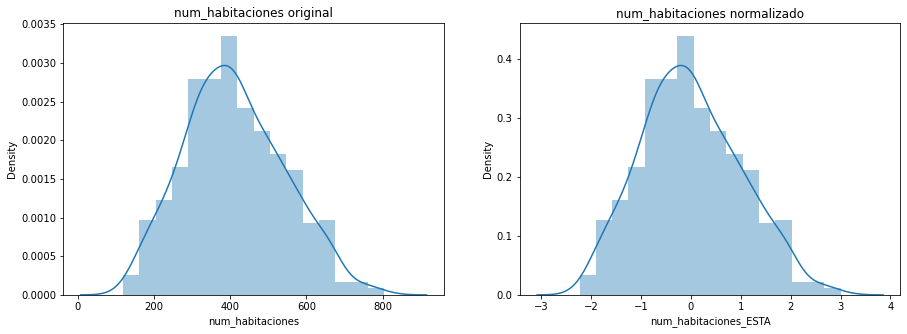

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('num_habitaciones original')
axes[1].set_title('num_habitaciones normalizado')

sns.distplot(df['num_habitaciones'] ,ax = axes[0])
sns.distplot(df['num_habitaciones_ESTA'], ax = axes[1]);

Si nos fijamos en los gráficas, ahora vemos que tenemos nuestros datos ajustados a una media de 0 y desviación de 1 👏🏽

### Sklearn StandardScaler

La estandarización que hemos visto antes, la podemos hacer también con un método de sklearn.

StandardScaler es el algoritmo más utilizado. Estandariza una característica restando la media y dividiendo todos los valores por la desviación estándar. 


Nos va a dar como resultado una distribución con una desviación estándar igual a 1. La varianza es igual a 1 también, porque varianza = desviación estándar al cuadrado. Y 1 al cuadrado = 1.
StandardScaler hace que la media de la distribución sea aproximadamente 0.

Su sintaxis:

```python
StandardScaler(copy=True, with_mean=True, with_std=True)
```


Donde: 

- `copy`: si queremos una copia de nuestra datos normalizada. 


- `with_mean`: booleano. Por defecto True.  Si es True, centra los datos antes de escalarlos. 


- `with_std`: booleano. Por defecto True. Si es Verdadero, escala los datos a una varianza unitaria (o equivalentemente, a una desviación estándar unitaria).

Usaremos la siguiente librería

```python
from sklearn.preprocessing import StandardScaler
```

In [34]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [35]:
num.head(2)

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa
6,1026.0,459.0,470.0,491.0,496.0,13803.0,11.25
12,1538.0,271.0,317.0,342.0,393.0,15627.0,5.50


In [36]:
num_col = num.columns.drop("median_home_val")
num_col

Index(['median_household_income', 'num_habitaciones', 'num_vecinos',
       'total_habitaciones', 'total_baños', 'dist_playa'],
      dtype='object')

In [37]:
# ajustamos nuestros datos

scaler.fit(df[num_col])

StandardScaler()

In [38]:
# transformamos los datos. 

X_escaladas = scaler.transform(df[num_col])
X_escaladas

array([[ 0.67480369,  0.45006215,  0.53946132,  0.29311927, -0.3956273 ,
        -0.13087942],
       [-0.8068499 , -0.72032434, -0.64281612, -0.49432897, -0.08183983,
        -0.79251359],
       [-1.65013147, -1.8601125 , -1.92031054, -2.04629005, -1.86306543,
         0.47322135],
       ...,
       [-1.6580126 , -1.54647952, -1.81715882, -1.74048491, -1.55168642,
        -0.55518829],
       [ 1.05309823,  0.71014804,  0.91239447,  0.60656954,  0.01071371,
        -0.03104204],
       [ 1.27377004,  1.51335445,  1.49956582,  1.49340444,  1.48675347,
        -0.00622371]])

In [39]:
df2 = df.copy()

In [40]:
df2[num_col] = X_escaladas
df2.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG,median_home_val_SQRT,median_home_val_BC
6,CA,F,1026.0,0.674804,0.450062,0.539461,0.293119,-0.395627,-0.130879,-0.287344,6.933423,32.031235,291.419573
12,CA,M,1538.0,-0.806850,-0.720324,-0.642816,-0.494329,-0.081840,-0.792514,-0.086007,7.338238,39.217343,400.745815
16,CA,F,596.0,-1.650131,-1.860112,-1.920311,-2.046290,-1.863065,0.473221,-0.456436,6.390241,24.413111,189.916496
19,CA,F,2362.0,1.888499,1.689295,1.840760,1.684533,0.873285,-0.397999,0.238020,7.767264,48.600412,561.488288
20,CA,F,2089.0,-0.775325,-0.880966,-0.801511,-0.777199,-0.966604,-0.605530,0.130666,7.644441,45.705580,509.825368


### Sklearn RobustScaler

RobustScaler transforma muestra variable restando la mediana y dividiéndola por el rango intercuartil (valor del 75% - valor del 25%).

Al igual que MinMaxScaler, nuestra variable con valores altos tendra ahora una escala similar a la de las otras variables. Tenemos que tene en cuenta que este método no escala los datos en un intervalo predeterminado como MinMaxScaler. No cumple con la definición estricta de escala definimos al incio.

Por lo tanto, el rango de cada variable después de aplicar RobustScaler será mayor que el de MinMaxScaler.

Utilizaremos este método si deseamos reducir los efectos de los *outliers*. 

Su sintaxis:

```python
RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
```
Donde: 

- `with_centering`: booleano. Por defecto True. Si es True, centra los datos antes de escalar. 


- `with_scaling`: booleano. Por defecto True. Si es True, escala los datos al rango intercuartílico.


- `quantile_rangetuple`: Por defecto, esto es igual al IQR, es decir, q_min es el primer cuantil y q_max es el tercer cuantil. (q_min, q_max), 0.0 < q_min < q_max < 100.0, predeterminado=(25.0, 75.0)
Rango de cuantiles utilizado para calcular el escalado. 


- `copy`: booleano. Por defecto True. Si es Falso, intente evitar una copia y, en su lugar, realice una escala en el lugar. Pero tenemos que tener en cuenta que no se garantiza que esto funcione siempre en el lugar; p.ej. si los datos no son una matriz NumPy o una matriz CSR scipy.sparse, aún se puede devolver una copia.

- `unit_variance`: booleano. Por defecto False. Si es Verdadero, escalamos los datos para que las variables distribuidas normalmente tengan una variación de 1. En general, si la diferencia entre los valores x de q_max y q_min para una distribución normal estándar es mayor que 1, el conjunto de datos se reducirá. Si es menor que 1, el conjunto de datos se ampliará.

Necesitaremos importar la siguiente librería 👇🏽

```python
from sklearn.preprocessing import RobustScaler
```


In [41]:
num_col

Index(['median_household_income', 'num_habitaciones', 'num_vecinos',
       'total_habitaciones', 'total_baños', 'dist_playa'],
      dtype='object')

In [42]:
# construir el modelo de escalador
robust = RobustScaler()

In [43]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(df[num_col])


RobustScaler()

In [44]:
# transformamos los datos
X_robust = robust.transform(df[num_col])

In [45]:
df3 = df.copy()

In [46]:
# por último convertiremos el array que nos devuelve en un dataframe. 

df3[num_col] = X_robust
df3.head()

,state,gender,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,median_home_val_NORM,median_home_val_LOG,median_home_val_SQRT,median_home_val_BC
6,CA,F,1026.0,0.568862,0.357724,0.471976,0.285298,-0.266734,0.055920,-0.287344,6.933423,32.031235,291.419573
12,CA,M,1538.0,-0.556886,-0.471545,-0.407080,-0.314410,-0.003891,-0.702001,-0.086007,7.338238,39.217343,400.745815
16,CA,F,596.0,-1.197605,-1.279133,-1.356932,-1.496361,-1.495929,0.747936,-0.456436,6.390241,24.413111,189.916496
19,CA,F,2362.0,1.491018,1.235772,1.439528,1.344978,0.796167,-0.250073,0.238020,7.767264,48.600412,561.488288
20,CA,F,2089.0,-0.532934,-0.585366,-0.525074,-0.529840,-0.745010,-0.487806,0.130666,7.644441,45.705580,509.825368
